In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [2]:
image_gen = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.1,
                               height_shift_range=0.1, 
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2, 
                               horizontal_flip=True, 
                               vertical_flip=True,
                               fill_mode='nearest' 
                              )

In [3]:
image_gen.flow_from_directory('dataset/train')

Found 1436 images belonging to 2 classes.


In [4]:
image_gen.flow_from_directory('dataset/test')

Found 348 images belonging to 2 classes.


In [5]:
image_shape = (255,255,3)

In [6]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)

In [7]:
pwd

'e:\\#KULIAH\\Final Business\\CNN Model dan Codingan'

In [8]:
from datetime import datetime

In [9]:
datetime.now().strftime("%Y-%m-%d--%H.%M")

'2022-04-09--14.17'

In [10]:
log_dir = 'logs\\fit-detection6'

board = TensorBoard(log_dir = log_dir, histogram_freq=1,write_graph=True, write_images=True, update_freq='epoch',profile_batch=2,embeddings_freq=1)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(255,255,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128))

model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        1

In [13]:
train_image_gen = image_gen.flow_from_directory('dataset/train',
                                               target_size=image_shape[:2],
                                               class_mode='binary')

Found 1436 images belonging to 2 classes.


In [14]:
train_image_gen.class_indices

{'no': 0, 'yes': 1}

In [15]:
test_image_gen = image_gen.flow_from_directory('dataset/test',
                                               target_size=image_shape[:2],
                                               class_mode='binary')

Found 348 images belonging to 2 classes.


In [16]:
test_image_gen.class_indices

{'no': 0, 'yes': 1}

In [17]:
results = model.fit(train_image_gen,validation_data=test_image_gen,epochs=17,callbacks=[early_stop,board])

Epoch 1/17
 1/45 [..............................] - ETA: 0s - loss: 0.6884 - accuracy: 0.5938WARNING:tensorflow:From E:\Anaconda\envs\OCR\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
45/45 [==============================] - 292s 6s/step - loss: 0.3876 - accuracy: 0.8203 - val_loss: 0.2379 - val_accuracy: 0.9741
Epoch 2/17
45/45 [==============================] - 238s 5s/step - loss: 0.0553 - accuracy: 0.9882 - val_loss: 0.0570 - val_accuracy: 0.9885
Epoch 3/17
45/45 [==============================] - 239s 5s/step - loss: 0.0441 - accuracy: 0.9909 - val_loss: 0.1272 - val_accuracy: 0.9856
Epoch 4/17
45/45 [==============================] - 242s 5s/step - loss: 0.0366 - accuracy: 0.9930 - val_loss: 0.0995 - val_accuracy: 0.9885
Epoch 5/17
45/45 [==============================] - 264s 6s/step - loss: 0.0

In [18]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


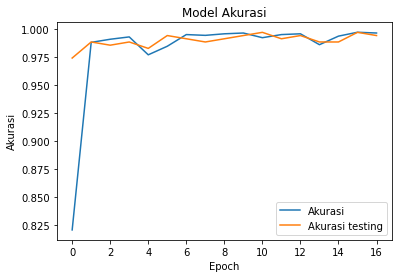

In [19]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Akurasi','Akurasi testing'], loc='lower right')
plt.savefig('ACC-Detect-6-IND.png')
plt.show()


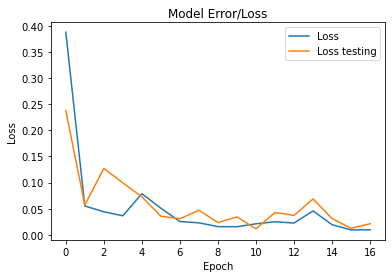

In [20]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Error/Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss','Loss testing'], loc='upper right')
plt.savefig('LOSS-Detect-6-IND.png')
plt.show()

In [21]:
train_image_gen.class_indices

{'no': 0, 'yes': 1}

In [22]:
model.save('CNN-Detect-6.h5')

In [23]:
model.save('CNN-Detect-6')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: CNN-Detect-6\assets


In [6]:
new_model = tf.keras.models.load_model('')

In [24]:
import numpy as np
from keras.preprocessing import image

foto = 'Test gambar\sakit3.jpg'

foto = image.load_img(foto, target_size=(255,255))

foto = image.img_to_array(foto)

foto = np.expand_dims(foto, axis=0)

foto = foto/255

In [25]:
foto.shape

(1, 255, 255, 3)

In [27]:
b=model.predict_classes(foto)
if b == 0:
    print('no')
elif b == 1:
    print('yes')

yes


In [34]:
b=model.predict_proba(foto)
print(b)

[[0.99994093]]


tensorboard --logdir logs\fit